In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df_train = pd.read_csv('algosports23-predictions-2025/train.csv')
df_train.head()

,GameID,Date,HomeConf,HomeID,HomeTeam,HomePts,AwayConf,AwayID,AwayTeam,AwayPts,HomeWinMargin
0,1001,1/1/2025,Yellow,123,Maine,21,Red,85,New Hope,131,-110
1,1002,1/1/2025,Green,53,Wyoming,77,Purple,70,Maryland,83,-6
2,1003,1/1/2025,Purple,68,Idaho,123,Red,83,Jefferson City,61,62
3,1004,1/1/2025,Purple,74,Salt Lake City,51,Crimson,22,Michigan,91,-40
4,1005,1/2/2025,Gold,33,El Paso,41,Orange,57,Denver,21,20


In [47]:
df_train.shape

(940, 11)

In [48]:
df_train.dtypes

GameID            int64
Date             object
HomeConf         object
HomeID            int64
HomeTeam         object
HomePts           int64
AwayConf         object
AwayID            int64
AwayTeam         object
AwayPts           int64
HomeWinMargin     int64
dtype: object

In [49]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train.dtypes

GameID                    int64
Date             datetime64[ns]
HomeConf                 object
HomeID                    int64
HomeTeam                 object
HomePts                   int64
AwayConf                 object
AwayID                    int64
AwayTeam                 object
AwayPts                   int64
HomeWinMargin             int64
dtype: object

In [50]:
df_train.columns

Index(['GameID', 'Date', 'HomeConf', 'HomeID', 'HomeTeam', 'HomePts',
       'AwayConf', 'AwayID', 'AwayTeam', 'AwayPts', 'HomeWinMargin'],
      dtype='object')

In [51]:
df_train['HomeConf'].value_counts()

HomeConf
Gold        92
Violet      89
Blue        81
Green       80
Yellow      75
Red         72
Bronze      72
Platinum    72
Silver      72
Crimson     68
Purple      64
White       55
Orange      48
Name: count, dtype: int64

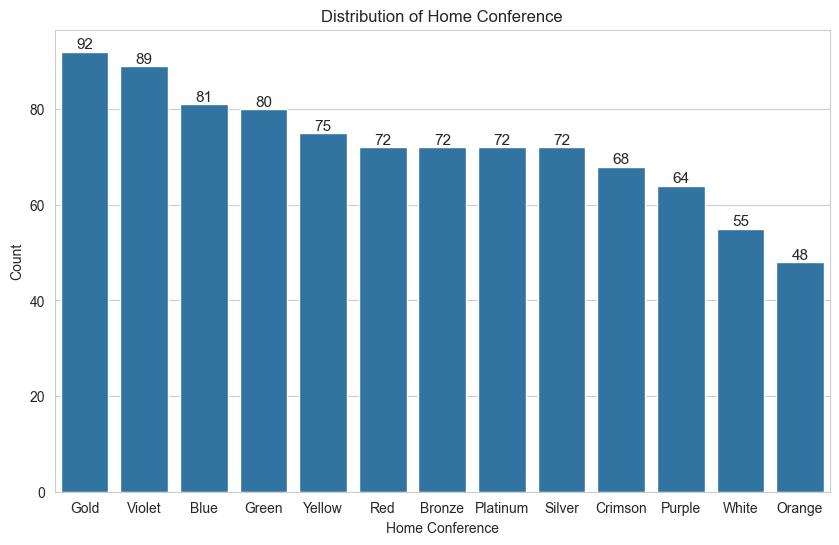

In [52]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
ax1 = sns.countplot(x='HomeConf', data=df_train, order=df_train['HomeConf'].value_counts().index)
plt.title('Distribution of Home Conference')
plt.xlabel('Home Conference')
plt.ylabel('Count')

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11)
plt.show()

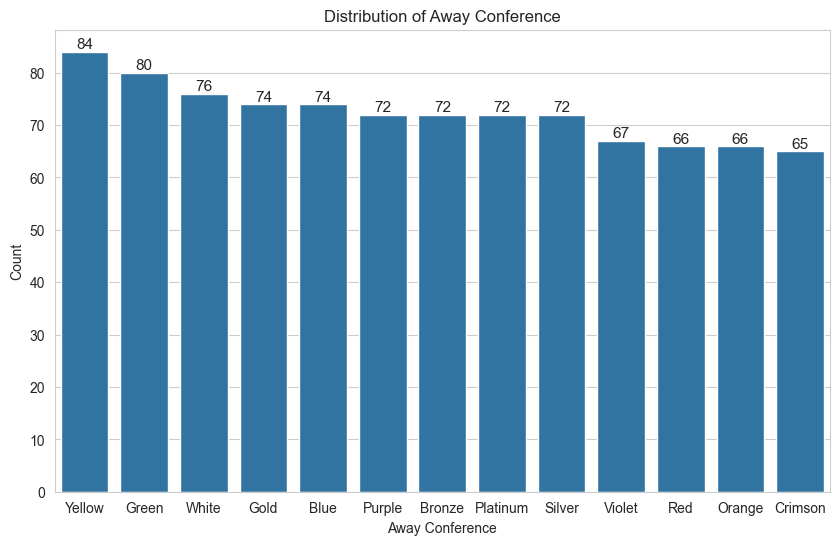

In [53]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
ax2 = sns.countplot(x='AwayConf', data=df_train, order=df_train['AwayConf'].value_counts().index)
plt.title('Distribution of Away Conference')
plt.xlabel('Away Conference')
plt.ylabel('Count')

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11)

plt.show()

In [55]:
df_train = df_train.sort_values('Date')

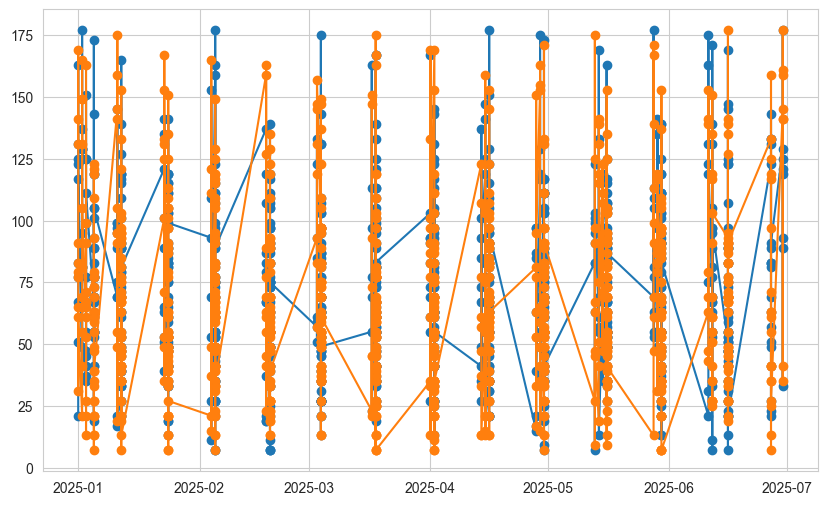

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_train['Date'], df_train['HomePts'], label='Home Score', marker='o')
plt.plot(df_train['Date'], df_train['AwayPts'], label='Away Score', marker='o')
